In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el archivo Excel
file_path = "Datosfinales.xlsx"  # Cambia esto si el archivo está en otra ruta
df = pd.read_excel(file_path, sheet_name="Hoja1")

# Verificar valores faltantes
print("Valores faltantes:", df.isnull().sum().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualizar distribución de los valores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h", palette="Blues")
plt.title("Distribución de los valores de voltaje")
plt.xlabel("Voltaje")
plt.show()

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados de las Distancias)')
plt.title('Método del Codo para determinar K óptimo')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Datosfinales.xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datosfinales.xlsx", sheet_name="Hoja1")

Saving Datosfinales.xlsx to Datosfinales.xlsx


In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = "Datosfinales.xlsx"
df = pd.read_excel(file_path, sheet_name="Hoja1")

# Verificar que se cargó correctamente
print(df.head())  # Muestra las primeras filas

      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20  
1  20.05  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67  
2  20.27  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55  
3  20.25  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72  
4  20.32  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95  

[5 rows x 37 columns]


In [ ]:
# Asegurar que todos los nombres de las columnas sean strings
df.columns = df.columns.astype(str)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


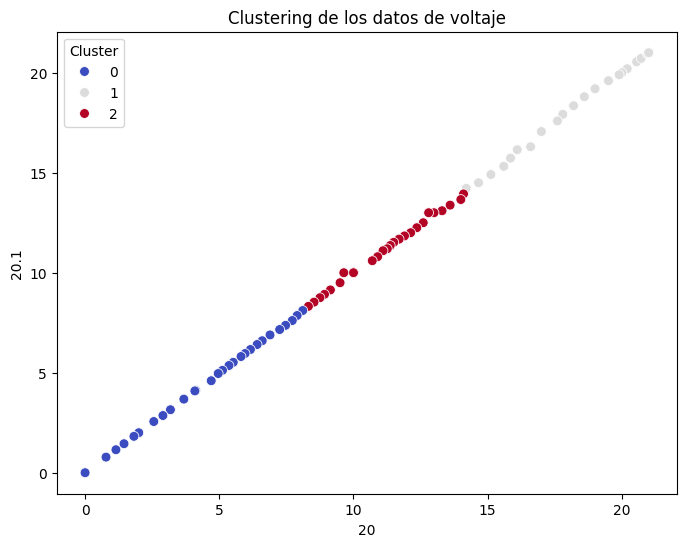

In [ ]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters en un gráfico de dispersión (tomando las dos primeras columnas como referencia)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df_numeric["Cluster"], palette="coolwarm", s=50)
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title("Clustering de los datos de voltaje")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Agregar los clusters al dataframe original
df_numeric["Cluster"] = kmeans.labels_

# Calcular estadísticas por cluster
stats_clusters = df_numeric.groupby("Cluster").agg(["mean", "std"])
print(stats_clusters)

                20                 20.1                 20.2            \
              mean       std       mean       std       mean       std   
Cluster                                                                  
0         4.322333  2.564903   4.305333  2.551101   4.318667  2.521988   
1        18.608462  2.299991  18.601538  2.352268  18.680385  2.281967   
2        11.037333  1.677854  11.003000  1.616783  11.043333  1.662693   

              20.3                 20.4            ...      20.32            \
              mean       std       mean       std  ...       mean       std   
Cluster                                            ...                        
0         4.257667  2.490769   4.178333  2.431670  ...   4.178333  2.431670   
1        18.726538  2.202776  18.684231  2.173204  ...  18.684231  2.173204   
2        10.915667  1.733664  10.851000  1.804910  ...  10.851000  1.804910   

             20.33                20.34                20.35            \
      

<ipython-input-32-6f36ce2afee0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-32-6f36ce2afee0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-32-6f36ce2afee0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-32-6f36ce2afee0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is de

ValueError: num must be an integer with 1 <= num <= 9, not 10

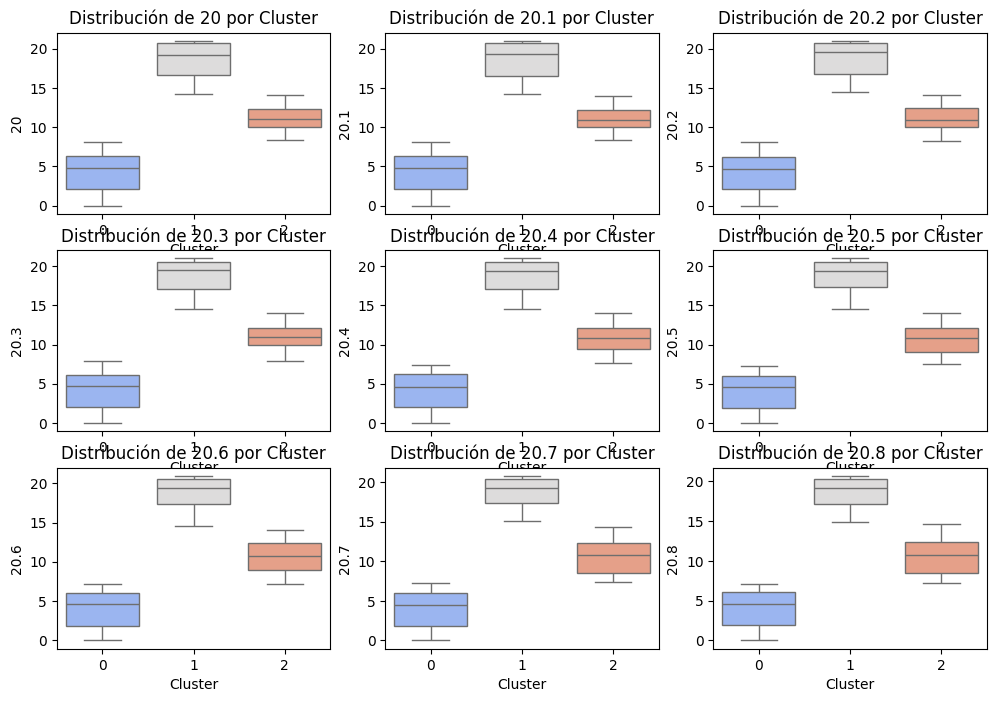

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar tamaño de gráficos
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, column in enumerate(df_numeric.columns[:-1]):  # Excluimos la columna "Cluster"
    plt.subplot(3, 3, i + 1)  # Ajusta según el número de variables
    sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
    plt.title(f"Distribución de {column} por Cluster")

plt.tight_layout()
plt.show()

<ipython-input-33-9c8eceec208a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-33-9c8eceec208a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-33-9c8eceec208a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-33-9c8eceec208a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is de

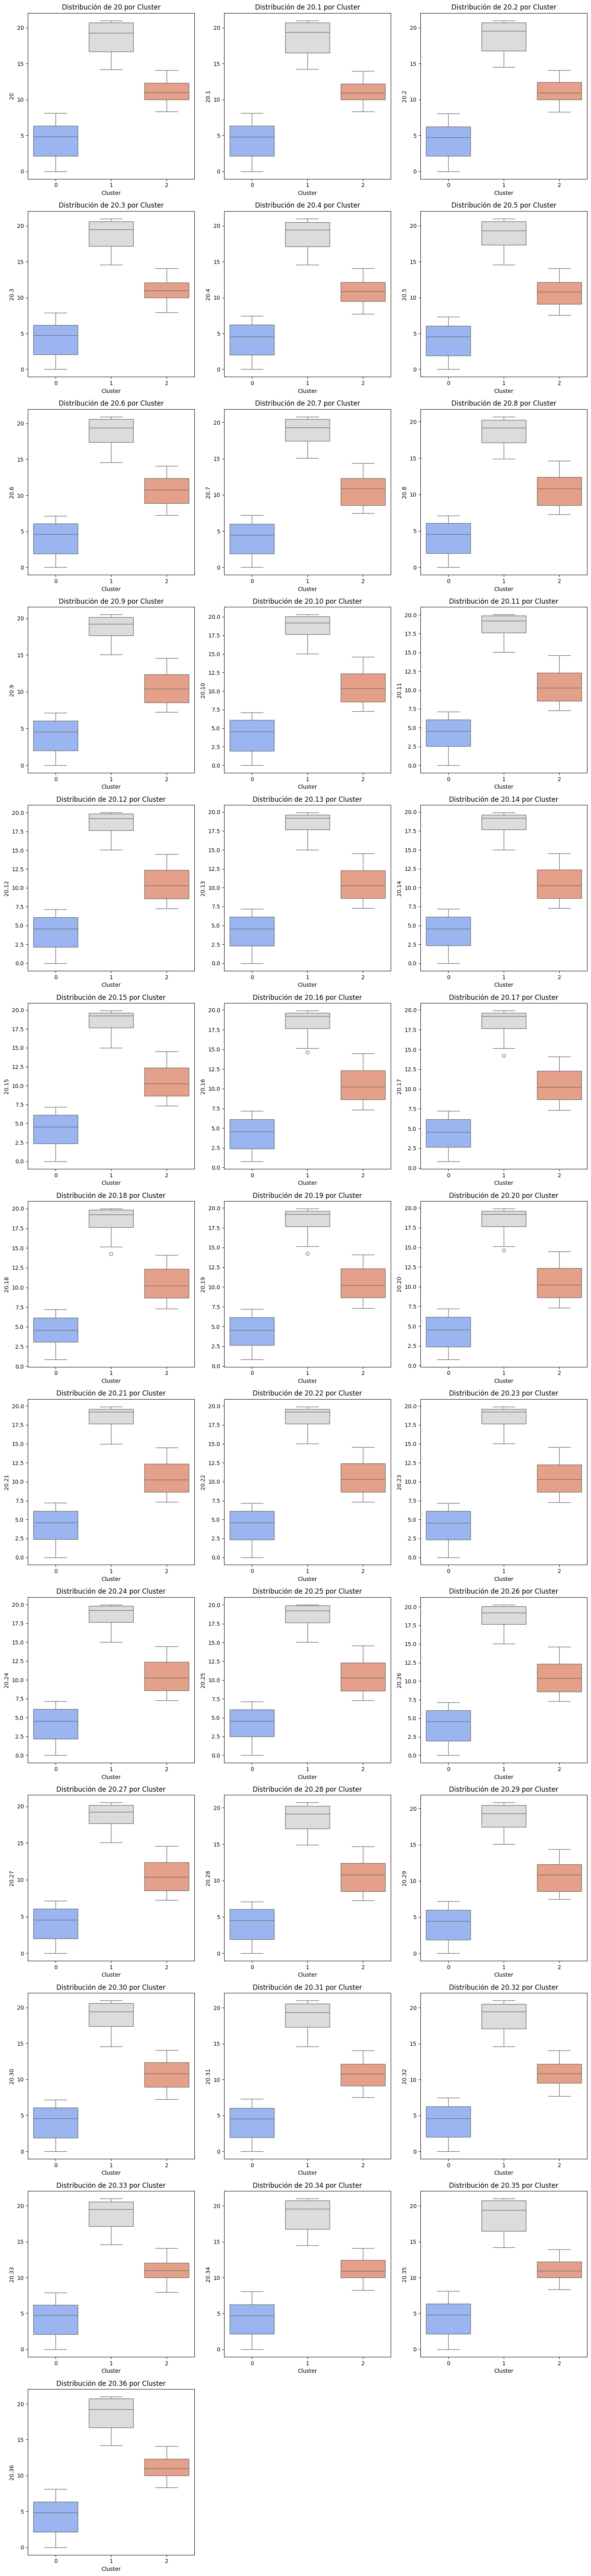

In [ ]:
import math

# Número de variables (excluyendo "Cluster")
num_vars = len(df_numeric.columns) - 1

# Calcular filas y columnas necesarias
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Crear un boxplot para cada variable
for i, column in enumerate(df_numeric.columns[:-1]):  # Excluimos "Cluster"
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
    plt.title(f"Distribución de {column} por Cluster")

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)  # Verifica si "Cluster" está en df
print(df.head())  # Muestra las primeras filas para ver si está la columna

Index(['20', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6', '20.7', '20.8',
       '20.9', '20.10', '20.11', '20.12', '20.13', '20.14', '20.15', '20.16',
       '20.17', '20.18', '20.19', '20.20', '20.21', '20.22', '20.23', '20.24',
       '20.25', '20.26', '20.27', '20.28', '20.29', '20.30', '20.31', '20.32',
       '20.33', '20.34', '20.35', '20.36'],
      dtype='object')
      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20 

In [ ]:
print(df.columns)  # Muestra todas las columnas

Index(['20', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6', '20.7', '20.8',
       '20.9', '20.10', '20.11', '20.12', '20.13', '20.14', '20.15', '20.16',
       '20.17', '20.18', '20.19', '20.20', '20.21', '20.22', '20.23', '20.24',
       '20.25', '20.26', '20.27', '20.28', '20.29', '20.30', '20.31', '20.32',
       '20.33', '20.34', '20.35', '20.36'],
      dtype='object')


In [ ]:
df["Cluster"] = clusters  # clusters debe ser la variable con los resultados del clustering

NameError: name 'clusters' is not defined

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters según tu caso
df["Cluster"] = kmeans.fit_predict(df)  # Agrega la columna con los clusters


<ipython-input-43-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-43-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-43-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-43-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

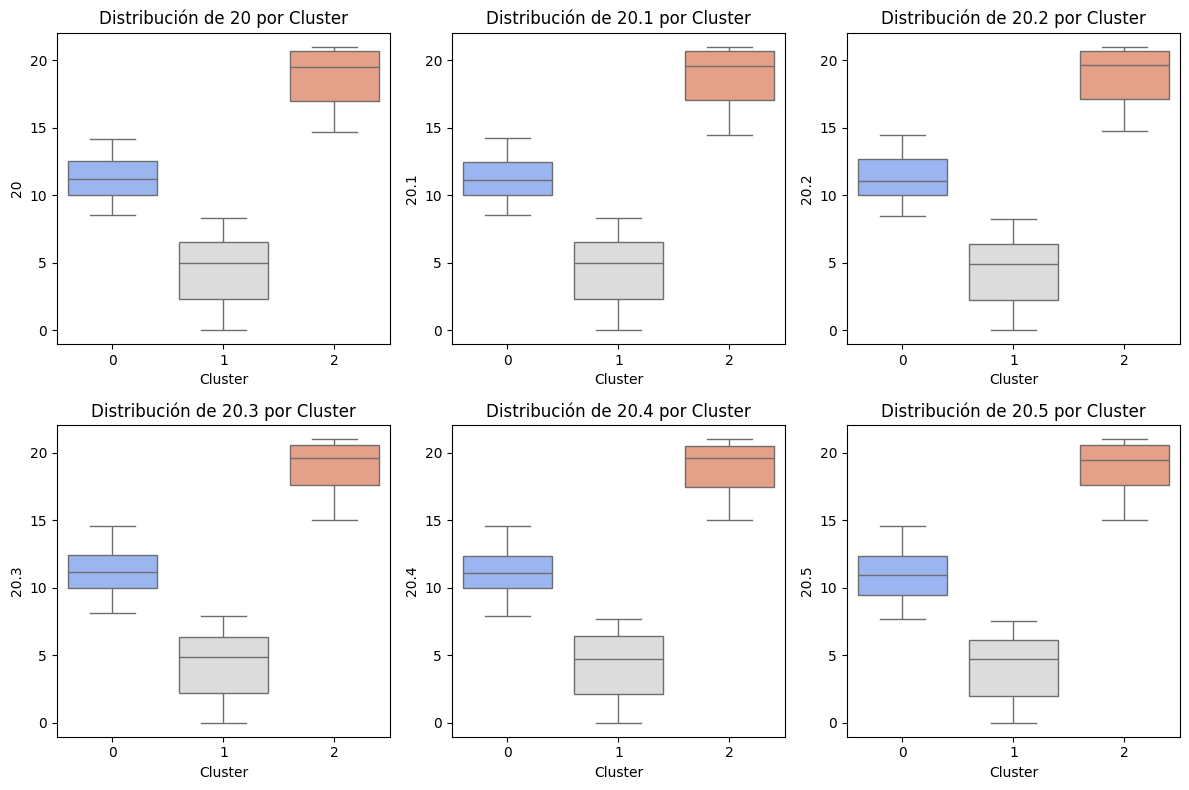

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Crear un boxplot para algunas variables (elige las más relevantes)
for i, column in enumerate(df.columns[:6]):  # Ajusta el número de columnas según lo que quieras ver
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
    plt.title(f"Distribución de {column} por Cluster")

plt.tight_layout()
plt.show()

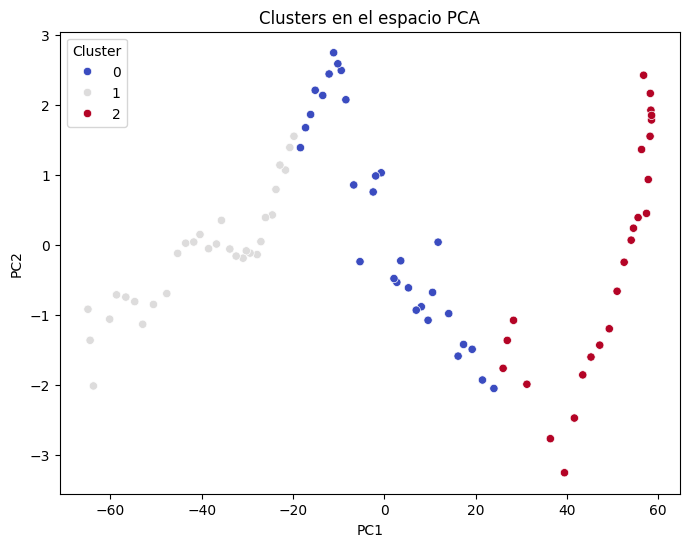

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["Cluster"]))  # Quitamos la columna "Cluster" para la transformación

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters en el espacio PCA")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots para ver la distribución de las variables en cada cluster
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Excluyendo la columna "Cluster"
    plt.subplot(5, 8, i + 1)  # Ajusta según el número de variables
    sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
    plt.title(f"{column} por Cluster")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pairplot para analizar relaciones entre variables
sns.pairplot(df, hue="Cluster", palette="coolwarm", diag_kind="kde")
plt.show()

In [5]:
import os
print(os.listdir())  # Esto te muestra los archivos disponibles en la carpeta actual

['.config', 'sample_data']


In [10]:
import os
print(os.listdir())

['.config', 'sample_data']


In [12]:
import os
print(os.listdir())

['.config', 'sample_data']


In [13]:
from google.colab import files
uploaded = files.upload()

Saving Datosfinales.xlsx to Datosfinales.xlsx


In [14]:
import pandas as pd

file_path = "Datosfinales.xlsx"  # Asegúrate de que el nombre es correcto
df = pd.read_excel(file_path, sheet_name="Hoja1")

print(df.head())  # Para verificar que se cargó bien

      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20  
1  20.05  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67  
2  20.27  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55  
3  20.25  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72  
4  20.32  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95  

[5 rows x 37 columns]


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters según tu caso
df["Cluster"] = kmeans.fit_predict(df.iloc[:, 1:])  # Excluye la primera columna si es un índice
print(df.head())  # Verifica que se haya agregado la columna "Cluster"

      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  Cluster  
0  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20        2  
1  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67        2  
2  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55        2  
3  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72        2  
4  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95        2  

[5 rows x 38 columns]


<ipython-input-17-75669916047c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-17-75669916047c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-17-75669916047c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-17-75669916047c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

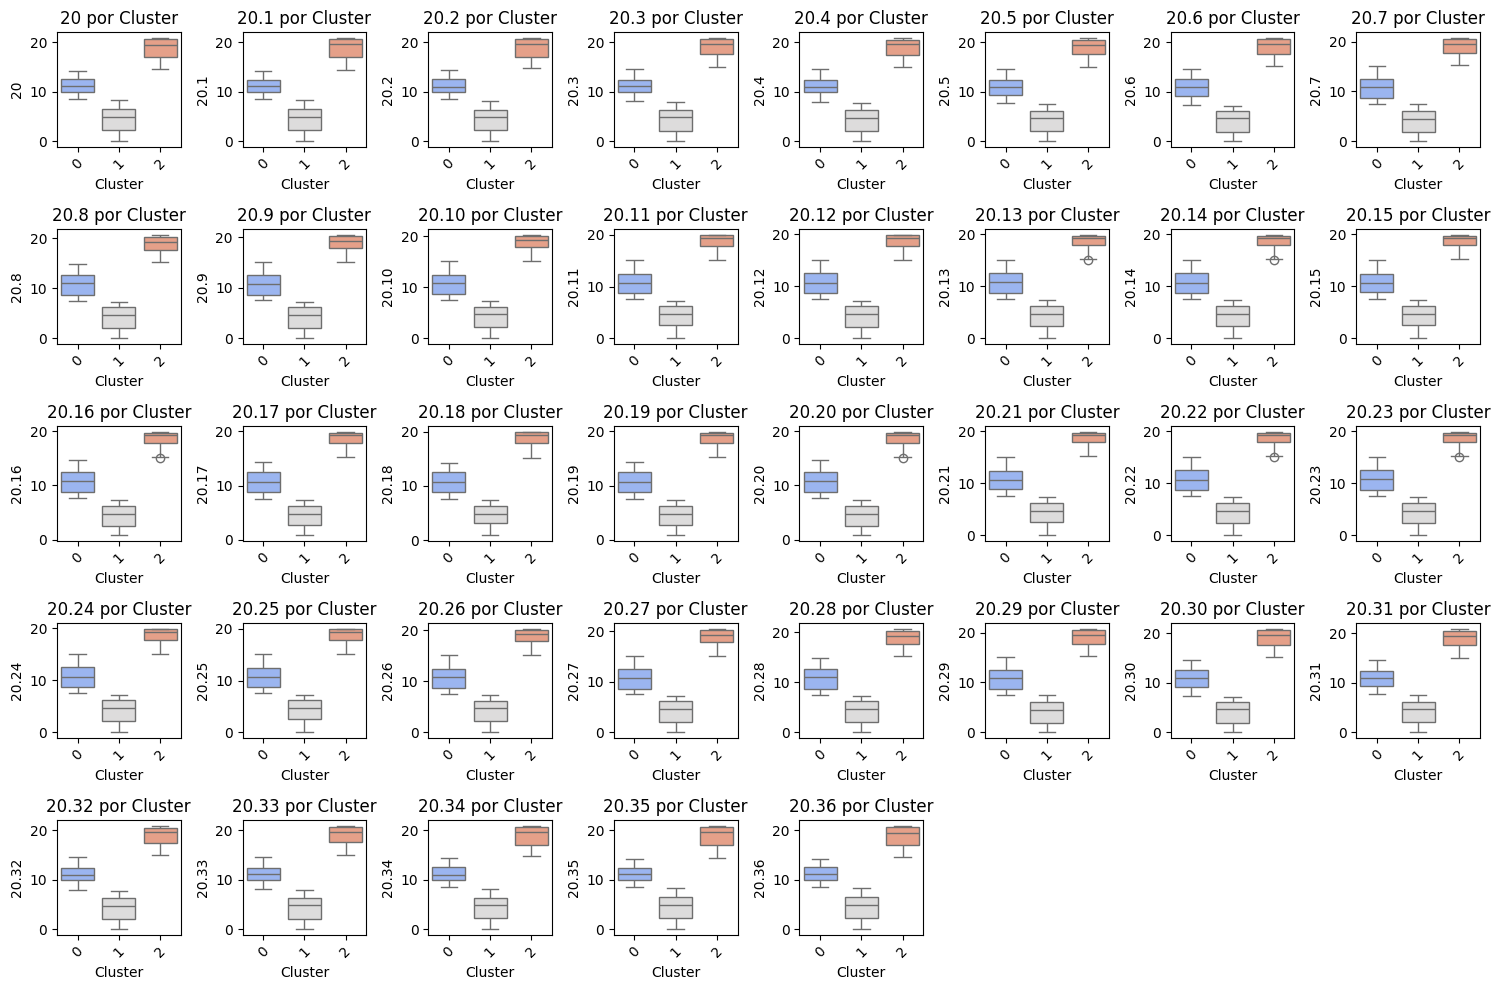

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Excluyendo la columna "Cluster"
    plt.subplot(5, 8, i + 1)  # Ajusta según el número de variables
    sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
    plt.title(f"{column} por Cluster")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Acelerador de iones ligeros para BNCT. Ahora, para aprovechar los 6000 datos que tomaste en el laboratorio de voltaje en la bandeja electrolítica, podemos aplicar los algoritmos que aprendimos hoy. Aquí algunas ideas:
    Análisis Exploratorio de Datos (EDA)
•	Graficar las líneas equipotenciales y vectores de campo eléctrico con Python.
•	Ver la distribución de voltajes y posibles anomalías en los datos.
   Reducción de Dimensionalidad (PCA)
•	Si hay muchas variables en los datos, podemos aplicar PCA para visualizar en 2D o 3D.
•	Esto nos puede ayudar a ver patrones en la forma en que los iones se mueven dentro de la columna aceleradora.
  Reglas de Asociación (Apriori / FP-Growth)
•	Buscar relaciones entre diferentes voltajes y configuraciones de los electrodos.
•	¿Podemos identificar qué configuraciones generan un mejor enfoque de los iones?
 Predicción con Modelos de Aprendizaje Automático
•	Usar DecisionTreeClassifier o RandomForestClassifier para predecir cómo se comportará el campo eléctrico dependiendo de la configuración de los electrodos.
•	Si tienes etiquetas sobre el comportamiento de los iones, podemos hacer clasificación o regresión.
Optimización con Redes de Hopfield
•	Si queremos encontrar el mejor camino para los iones dentro de la columna aceleradora, podríamos experimentar con redes de Hopfield.
